In [1]:

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

In [2]:
# Open the file
with open('water.lammpstrj', 'r') as f:
    data = f.readlines()
n_atoms = int(data[3].strip()) # Total number of atoms in the system

In [3]:
# Helper function to return a list of coordinates for the
# frame of interest. `start` and `end` variables are the line
# numbers to read.

def get_cordinates_for_frame(data, start, end):
    coordinates = []
    for l in data[start: end+1]:    #frames can be skipped if we run for a larger number of frames. Due to lack of resources, 3 frames are taken at a time.
        s = l.split()
        try:
            if int(s[1]) == 2: # Get only oxygen atoms
                coordinates.append([float(s[3]), float(s[4]), float(s[5])])
        except:
            continue
    return coordinates

In [4]:
# Helper function to calculate the distance between atoms
# keeping in mind the boundary conditions

def distance_between_points(p, q):
    distance_x = abs(p[0] - q[0])
    distance_x = min(distance_x, abs(box_size - distance_x))
    distance_y = abs(p[1] - q[1])
    distance_y = min(distance_y, abs(box_size - distance_y))
    distance_z = abs(p[2] - q[2])
    distance_z = min(distance_z, abs(box_size - distance_z))
    
    return np.lib.scimath.sqrt(distance_x**2 + distance_y**2 + distance_z**2)

In [5]:
# Initialise the calculation

n_bins = 200
n_frames = 3
box_size = 62
increment = box_size / (2 * n_bins)
r_cut = 31 #r_cut value can be changed accordingly

In [ ]:
# Loop over all the frames and for each frame and find the distribution of distances

distribution = np.zeros(n_bins)

for k in range(n_frames):
    start = k*n_atoms + (k+1)*9
    end = start + n_atoms
    coordinates = []
    coordinates = get_cordinates_for_frame(data, start, end)
    n_particles = len(coordinates)
    print(n_particles)
    for i in range(n_particles-1):
        for j in range(i+1, n_particles):
            distance = distance_between_points(coordinates[i], coordinates[j])
            if distance < (r_cut):
                ig = int(distance / increment)
                distribution[ig] = distribution[ig] + 2

In [50]:
# Calculate g(r) by normalising the distribution
for j in range(n_bins):
    distribution[j] = distribution[j]/n_frames

density = n_particles/box_size**3
for j in range(n_bins):
    r1 = distribution[j]
    r2 = r1 + increment
    vol_bin = (4/3) * sp.pi * (r2**3 - r1**3)
    n_ideal = vol_bin * density
    distribution[j] = distribution[j] / n_ideal
    
print(distribution)

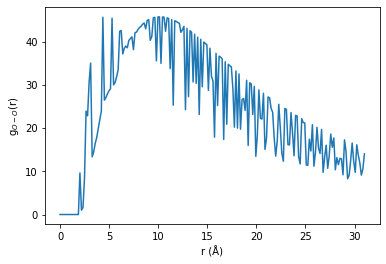

In [51]:
# for r = 31
radii = np.linspace(0.0, n_bins*increment, n_bins)
plt.xlabel('r (Å)')
plt.ylabel('g$_{O-O}$(r)')
plt.plot(radii, distribution)
plt.show()